In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
proj = '52Cr'
trg = '150Sm'
cn = '202Rn'
bf = 0.68
ch = 'xn'
sigr = 3.0
# bf_diff = 0.01

In [52]:
df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

df10_mb.describe()

,E_lab,E*/MeV,193Rn,194Rn,195Rn,196Rn,197Rn,198Rn,199Rn,200Rn,201Rn,202Rn
count,70.000000,70.000000,70.0,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,70.000000,7.000000e+01,7.000000e+01
mean,246.827329,56.500000,0.0,9.666657e-13,2.593308e-09,3.465019e-08,1.051174e-06,8.377599e-06,5.492078e-05,0.000011,2.233321e-07,1.188572e-07
std,27.406131,20.351085,0.0,4.837118e-12,6.884392e-09,5.922498e-08,1.919600e-06,1.740485e-05,1.142775e-04,0.000023,5.482406e-07,7.433016e-07
min,200.367000,22.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,223.597500,39.250000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,246.827500,56.500000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.320000e-08,9.410000e-09,2.030000e-08,0.000000,0.000000e+00,0.000000e+00
75%,270.057250,73.750000,0.0,0.000000e+00,1.350000e-12,4.662500e-08,9.957500e-07,3.875000e-06,2.555000e-05,0.000004,3.412500e-09,0.000000e+00
max,293.287000,91.000000,0.0,3.540000e-11,2.750000e-08,1.890000e-07,6.450000e-06,6.310000e-05,4.130000e-04,0.000085,2.180000e-06,5.660000e-06


In [53]:
e_lab = [224, 232, 240]
exp_data = [[np.nan,2.51E-06,4.66E-05],[1.82E-04,2.46E-04,1.12E-04],[6.99E-05,np.nan,np.nan]]
exp_data=np.array(exp_data)

In [54]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab','E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab','E*/MeV'], var_name='isotope', value_name='CS')

dfm10=dfm10_mb
df10=df10_mb

dfm0=dfm0_mb
df0=df0_mb

mb=1
ub=1e3
nb=1e6

scale=ub

dfm10['CS']=dfm10_mb['CS']*scale
dfm0['CS']=dfm0_mb['CS']*scale
exp_data=exp_data*scale


/tmp/ipykernel_97632/858225926.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[7:-2]))], palette=colors)
/tmp/ipykernel_97632/858225926.py:12: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[7:-2]))], palette=colors, ls=':', legend=None)


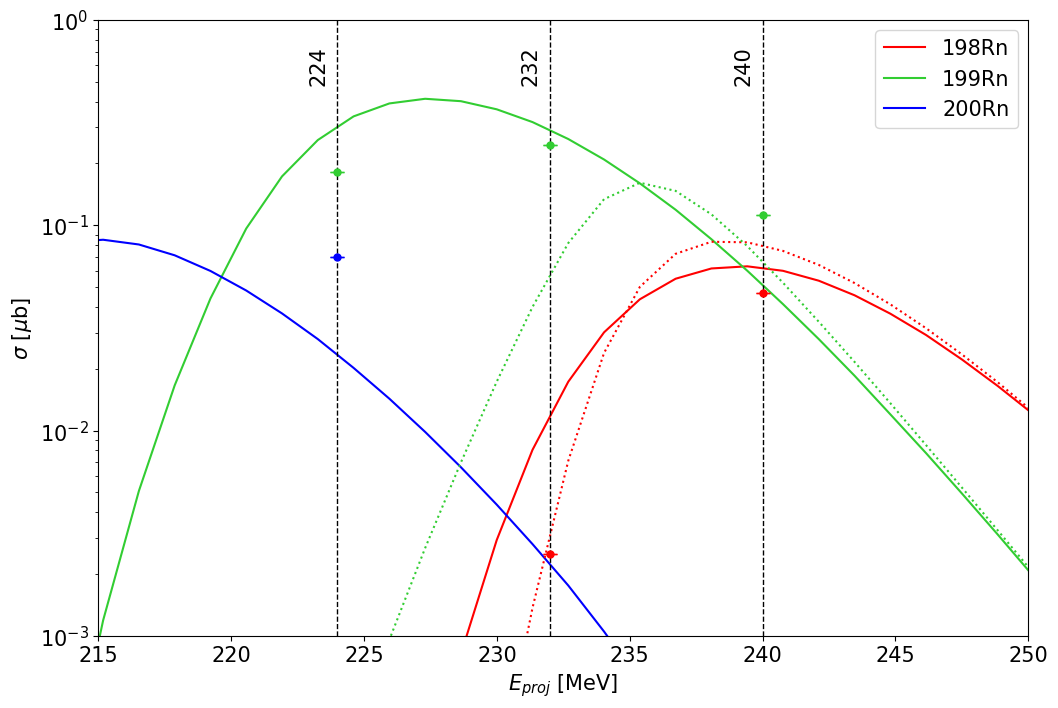

In [55]:
plt.rcParams.update({'font.size': 15})
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']

y_lower = 1e-3
y_upper = 1e-0
x_lower = 215
x_upper = 250

fig,ax=plt.subplots(figsize=(12,8))

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[7:-2]))], palette=colors)
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[7:-2]))], palette=colors, ls=':', legend=None)

plt.semilogy()
plt.ylim(y_lower,y_upper)
plt.xlim(x_lower,x_upper)

for energy in e_lab:
    plt.plot([energy, energy], [y_lower, y_upper], linewidth=1, color='black', linestyle='--')
    plt.text(energy-1.1, y_upper*0.5, str(energy), rotation=90)
    
for i in range(len(exp_data)):
    (_, caps, _) = plt.errorbar(e_lab, exp_data[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)

if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf')